In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns

In [2]:
#read the dataset
df = pd.read_csv("data1.csv")

In [3]:
df.head()

,6.1101,17.592
0,5.5277,9.1302
1,8.5186,13.6620
2,7.0032,11.8540
3,5.8598,6.8233
4,8.3829,11.8860


In [4]:
##naming the columns
df.columns = ['population','profit']

In [5]:
df.head()

,population,profit
0,5.5277,9.1302
1,8.5186,13.6620
2,7.0032,11.8540
3,5.8598,6.8233
4,8.3829,11.8860


In [6]:
df.describe()

,population,profit
count,96.000000,96.000000
mean,8.181151,5.716709
std,3.884451,5.404947
min,5.026900,-2.680700
25%,5.690950,1.952550
50%,6.735950,4.455300
75%,8.639925,6.879150
max,22.203000,24.147000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   population  96 non-null     float64
 1   profit      96 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


<AxesSubplot:xlabel='profit', ylabel='population'>

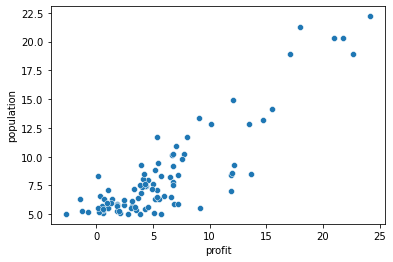

In [8]:
sns.scatterplot(data = df,x = 'profit', y = 'population')

In [9]:
##function to compute the cost function
def computeCost(X,y,theta):
    inner_product = np.power(((X * theta.T) - y) , 2) 
    return np.sum(inner_product) / (2 * len(X))

In [10]:
##adding ones to the start of the dataframe
df.insert(0,'ones',[1]*96)
df.head()

,ones,population,profit
0,1,5.5277,9.1302
1,1,8.5186,13.6620
2,1,7.0032,11.8540
3,1,5.8598,6.8233
4,1,8.3829,11.8860


In [11]:
X = df['population']
y = df['profit']

In [28]:
##taking theta intially as [0,0]
theta = np.zeros(2,dtype = int)
theta

array([0, 0])

In [50]:
##converting X and y to numpy arrays
X_mat=df[df.columns[1:]].to_numpy()
y_mat=df[df.columns[2:]].to_numpy()
theta=np.matrix(np.array([0,0]))

In [51]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    # With each iteration, we are calculating the changes to be made to the
    # parameter (theta) value to reduce the error (cost)

        # number of parameters to be calculated,here we have 2 parameters theta [0,0] and theta [0,1]
        
        
    return theta, cost

In [52]:
alpha = 0.01
iters = 1000

In [53]:
g,cost = gradientDescent(X, y, theta, alpha, iters)

Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

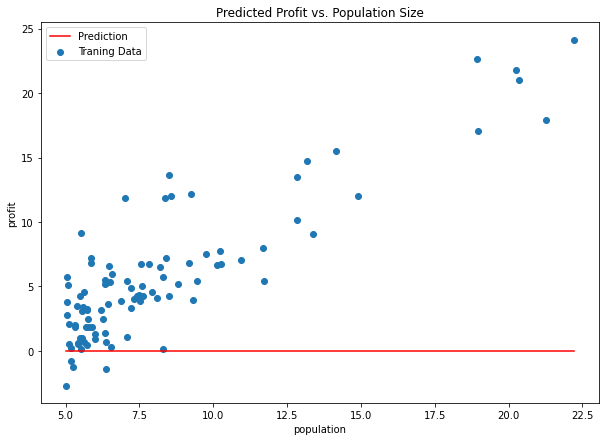

In [55]:
x = np.linspace(df.population.min(), df.population.max(), 100)  
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(10, 7))  
ax.plot(x, f, 'r', label='Prediction')  
ax.scatter(df.population, df.profit, label='Traning Data')  
ax.legend(loc=2)  
ax.set_xlabel('population')  
ax.set_ylabel('profit')  
ax.set_title('Predicted Profit vs. Population Size')

Text(0.5, 1.0, 'Error vs Training epoch')

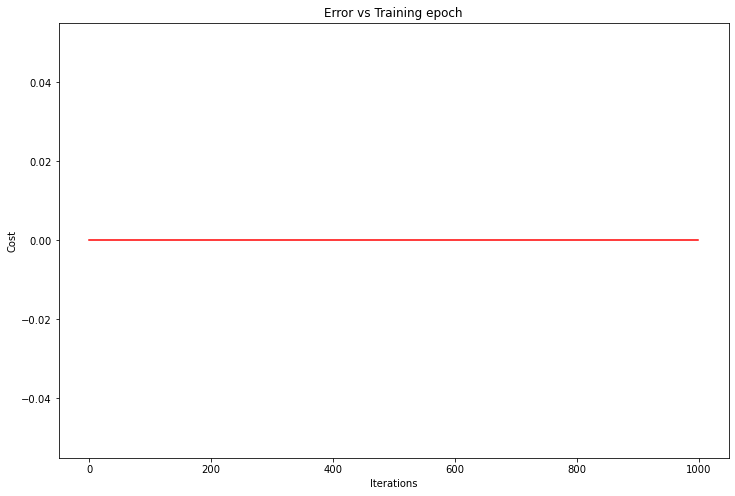

In [56]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs Training epoch')

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
lm = LinearRegression()

In [61]:
lm.fit(X_train,y_train)

LinearRegression()

In [62]:
predictions = lm.predict(X_test)

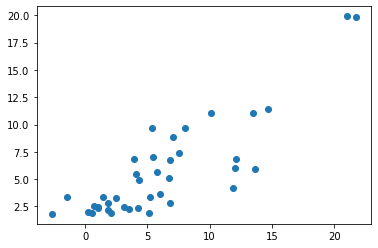

In [63]:
plt.scatter(y_test,predictions)

In [64]:
from sklearn import metrics

In [65]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2.284125545561213
MSE: 8.938309813086398
RMSE: 2.9897006226521072
